<a href="https://colab.research.google.com/github/HectorAbraham/Ecs.-Dif.-Parciales/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Propiedades de los Polinomios de Legendre

Este notebook utiliza las librerías `SymPy` y `SciPy` para explorar y verificar propiedades de los polinomios de Legendre.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from sympy import symbols, diff, simplify, factorial, Function, Rational, Eq, lambdify, init_printing

init_printing()

x = symbols('x')


### (a) Graficación de Polinomios
Se grafican los polinomios de Legendre \( P_n(x) \) para \( n = 0, ..., 5 \) usando `scipy.special.legendre`. Esto permite visualizar su forma y simetría.


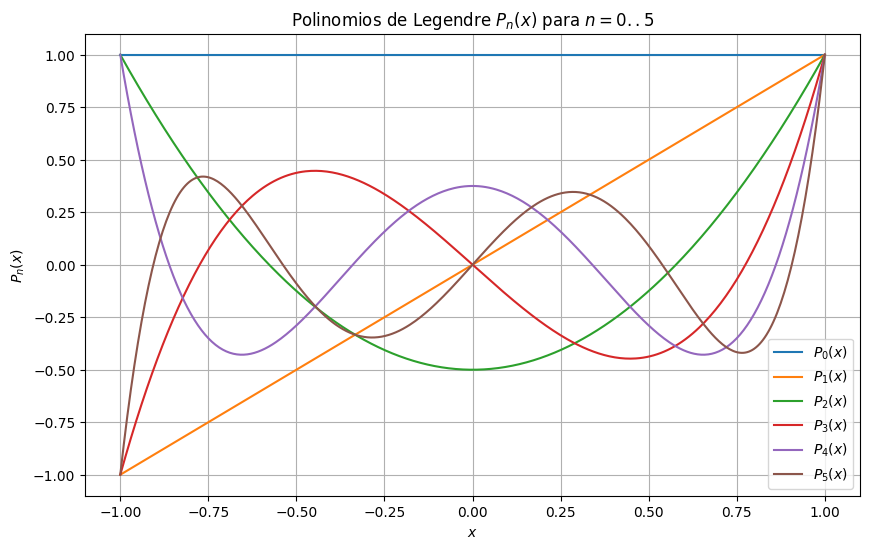

In [2]:
x_vals = np.linspace(-1, 1, 400)
plt.figure(figsize=(10, 6))

for n in range(6):
    Pn = legendre(n)
    plt.plot(x_vals, Pn(x_vals), label=f'$P_{n}(x)$')

plt.title('Polinomios de Legendre $P_n(x)$ para $n=0..5$')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.grid(True)
plt.legend()
plt.show()


### (b) Verificación Gráfica de Relación Diferencial
Se evalúa gráficamente la identidad:
\[
(1 - x^2) P_n'(x) = (n + 1)x P_n(x) - (n + 1) P_{n+1}(x)
\]
para \( n = 3 \), comparando ambos lados de la ecuación en un gráfico.

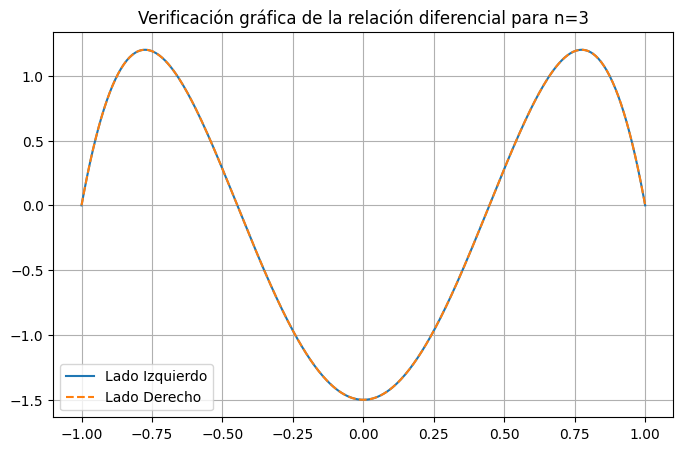

In [3]:
from sympy.abc import x
from sympy import legendre as sym_legendre

n = 3
Pn = sym_legendre(n, x)
Pn1 = sym_legendre(n + 1, x)
lhs = (1 - x**2) * diff(Pn, x)
rhs = (n + 1) * x * Pn - (n + 1) * Pn1

f_lhs = lambdify(x, lhs, 'numpy')
f_rhs = lambdify(x, rhs, 'numpy')

x_vals = np.linspace(-1, 1, 400)
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_lhs(x_vals), label='Lado Izquierdo')
plt.plot(x_vals, f_rhs(x_vals), '--', label='Lado Derecho')
plt.title('Verificación gráfica de la relación diferencial para n=3')
plt.grid(True)
plt.legend()
plt.show()


### (c) Verificación Algebraica de Relación Diferencial
Se comprueba algebraicamente que la misma identidad del punto (b) se cumple utilizando `sympy.simplify`.


In [4]:
simplify(lhs - rhs)


0

### (d) Verificación Algebraica de la Relación de Recurrencia
Se valida la relación de recurrencia:
\[
(n + 1)P_{n+1}(x) - (2n + 1)xP_n(x) + nP_{n-1}(x) = 0
\]
para \( n = 3 \), simplificando simbólicamente la expresión.


In [5]:
n = 3
Pn1 = sym_legendre(n + 1, x)
Pn = sym_legendre(n, x)
Pn_1 = sym_legendre(n - 1, x)

recurrence = (n + 1)*Pn1 - (2*n + 1)*x*Pn + n*Pn_1
simplify(recurrence)


0

### (e) Verificación de la Fórmula de Rodrigues
Se define y evalúa la fórmula de Rodrigues:
\[
P_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} (x^2 - 1)^n
\]
comparando el resultado con la función `legendre(n, x)` de `sympy` para \( n = 0, ..., 5 \).

In [6]:
def rodrigues(n):
    expr = (x**2 - 1)**n
    deriv = diff(expr, x, n)
    return simplify(1 / (2**n * factorial(n)) * deriv)

for n in range(6):
    print(f"n = {n}")
    print("Rodrigues:", rodrigues(n))
    print("Legendre :", sym_legendre(n, x))
    print("Iguales?:", simplify(rodrigues(n) - sym_legendre(n, x)) == 0)
    print("-"*40)


n = 0
Rodrigues: 1
Legendre : 1
Iguales?: True
----------------------------------------
n = 1
Rodrigues: x
Legendre : x
Iguales?: True
----------------------------------------
n = 2
Rodrigues: 3*x**2/2 - 1/2
Legendre : 3*x**2/2 - 1/2
Iguales?: True
----------------------------------------
n = 3
Rodrigues: x*(5*x**2 - 3)/2
Legendre : 5*x**3/2 - 3*x/2
Iguales?: True
----------------------------------------
n = 4
Rodrigues: 35*x**4/8 - 15*x**2/4 + 3/8
Legendre : 35*x**4/8 - 15*x**2/4 + 3/8
Iguales?: True
----------------------------------------
n = 5
Rodrigues: x*(63*x**4 - 70*x**2 + 15)/8
Legendre : 63*x**5/8 - 35*x**3/4 + 15*x/8
Iguales?: True
----------------------------------------
